<a href="https://colab.research.google.com/github/pascuapablo/CEIA/blob/master/src/ComputerVisionII/Clase_1_Modelo_convolucional_aplicacion_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales convolucionales: Aplicación

¿Qué vamos a hacer?

- Implementar una red convolucional en Keras
- Entrenar la red en un dataset con fotos números con señas
- Usar la red para predecir en ejemplos nuevos

In [ ]:
from google.colab import files

uploaded = files.upload()
#subir el archivo dataset.zip

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: cnn_utils.py            
   creating: datasets/
  inflating: datasets/test_signs.h5  
  inflating: datasets/train_signs.h5  


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [ ]:
# Cargar el dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

SIGNS es un dataset con una colección de 6 signos hechos con manos representando los números del 0 al 5.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

La próxima celda muestra un ejemplo de seña y su label.

y = 2


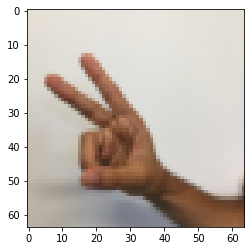

In [ ]:
# Ejemplo del dataset
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
# veamos un poco el dataset
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("Número de ejemplos de training = " + str(X_train.shape[0]))
print ("Número de ejemplos de test = " + str(X_test.shape[0]))
print ("dimensiones de X_train: " + str(X_train.shape))
print ("dimensiones de Y_train: " + str(Y_train.shape))
print ("dimensiones de X_test: " + str(X_test.shape))
print ("dimensiones de Y_test shape: " + str(Y_test.shape))

Número de ejemplos de training = 1080
Número de ejemplos de test = 120
dimensiones de X_train: (1080, 64, 64, 3)
dimensiones de Y_train: (1080, 6)
dimensiones de X_test: (120, 64, 64, 3)
dimensiones de Y_test shape: (120, 6)


Estas son las capas de keras que vamos a utilizar:

Capa Convolucional:

`Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)`


Capa Max Pooling, la función tiene estos parámetros: 

`MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)`

Capa Flatten:

`Flatten(
    data_format=None, **kwargs
)`

Capa Dense:

`Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)`

Fuente: tps://www.tensorflow.org/api_docs/python/tf/keras/layers

Estructura de la red en detalle:

- CONV2D: filtro de 4x4, 8 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 8x8, stride 8, padding 'SAME'
- CONV2D: filtro de 2x2, 16 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 4x4, stride 4, padding 'SAME'
- FLATTEN
- Capa FC con 6 salidas


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow import keras

#NOTA: Cambie los strids de las capas de max pool porque la red quedaba  en un minimo local y no continuaba aprendiendo.



keras.backend.clear_session()

del model
model = Sequential([
           Conv2D(
               filters = 8, 
                  kernel_size = (4, 4), 
                  strides=1, 
                  padding='same', 
                  activation='relu',
                  input_shape=(64, 64, 3)), 


           MaxPooling2D(pool_size=(8,8),
                        strides=2,
                        padding='same'),
                    
           Conv2D(filters = 16, 
                  kernel_size = (2, 2), 
                  strides=1, 
                  padding='same', 
                  activation='relu'),

           MaxPooling2D(pool_size=(4,4),
                        strides=2,
                        padding='same'),
                    
           Flatten(),

           Dense(units=6,
                 activation='softmax')
           ])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 24582     
Total params: 25,502
Trainable params: 25,502
Non-trainable params: 0
____________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
 
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

model_history = model.fit(X_train, Y_train, epochs=30,batch_size= 64,
                    validation_data=(X_test, Y_test))

Epoch 1/30
17/17 [==============================] - 4s 209ms/step - loss: 1.8722 - accuracy: 0.2037 - val_loss: 1.7284 - val_accuracy: 0.2833
Epoch 2/30
17/17 [==============================] - 3s 188ms/step - loss: 1.6056 - accuracy: 0.4046 - val_loss: 1.4627 - val_accuracy: 0.4500
Epoch 3/30
17/17 [==============================] - 3s 183ms/step - loss: 1.3141 - accuracy: 0.5176 - val_loss: 1.2161 - val_accuracy: 0.5333
Epoch 4/30
17/17 [==============================] - 3s 185ms/step - loss: 1.0324 - accuracy: 0.6722 - val_loss: 1.0598 - val_accuracy: 0.5500
Epoch 5/30
17/17 [==============================] - 3s 182ms/step - loss: 1.0279 - accuracy: 0.6028 - val_loss: 1.0649 - val_accuracy: 0.6500
Epoch 6/30
17/17 [==============================] - 3s 182ms/step - loss: 0.8422 - accuracy: 0.7278 - val_loss: 0.9361 - val_accuracy: 0.6500
Epoch 7/30
17/17 [==============================] - 3s 182ms/step - loss: 0.7908 - accuracy: 0.7435 - val_loss: 0.9478 - val_accuracy: 0.6000
Epoch 

Prediccion [0 0 0 5 2 0 3 1 5 1]


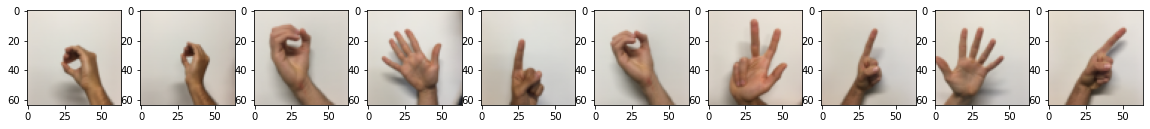

In [ ]:
y_predict = model.predict(x=X_test)

n = 10
print("Prediccion",np.argmax(y_predict[:n], axis=1)) # [7, 2, 1, 0, 4]


# Plotear esas imágenes
fi,ax =	plt.subplots(1,n,figsize=(20,20))

for i in range(n):
  ax[i].imshow(X_test[i], cmap=plt.get_cmap('gray'))

plt.show()


In [ ]:
 Sequential([
           Conv2D(
               filters = 8, 
                  kernel_size = (4, 4), 
                  strides=1, 
                  padding='same', 
                  activation='relu',
                  input_shape=(64, 64, 3)), 


           MaxPooling2D(pool_size=(8,8),
                        strides=8,
                        padding='same'),
                    
           Conv2D(filters = 16, 
                  kernel_size = (2, 2), 
                  strides=1, 
                  padding='same', 
                  activation='relu'),

           MaxPooling2D(pool_size=(4,4),
                        strides=4,
                        padding='same'),
                    
           Flatten(),

           Dense(units=6,
                 activation='softmax')
           ]).summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
____________________________________________________